#### Real-World Practical Example: E-commerce Sales Dashboard
This comprehensive example demonstrates a complete data visualization workflow for an e-commerce business analyzing their sales performance, customer behavior, and product trends.

##### Project Overview
**Business Context**: You're a data analyst at "TechStore Plus," an online electronics retailer. The company needs insights into sales performance, customer behavior, and inventory management for Q4 2023 planning.

##### Objectives:
- Analyze sales trends and seasonality
- Identify top-performing products and categories
- Understand customer behavior patterns
- Assess regional performance
- Provide actionable recommendations

####  Step 1: Data Generation and Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for professional-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Ste random for reproducibility
np.random.seed (42)



In [3]:
def generate_ecommerce_data():
    """Generate realistic e-commerce sales data"""
    
    # Date range: 18 months of data
    start_date = datetime(2022, 1, 1)
    end_date = datetime(2023, 6, 30)
    date_range = pd.date_range(start_date, end_date, freq='D')
    
    # Product categories and their characteristics
    categories = {
        'Smartphones': {'avg_price': 599, 'std_price': 200, 'seasonal_boost': [11, 12, 1]},
        'Laptops': {'avg_price': 899, 'std_price': 300, 'seasonal_boost': [8, 9]},
        'Headphones': {'avg_price': 149, 'std_price': 75, 'seasonal_boost': [11, 12]},
        'Tablets': {'avg_price': 349, 'std_price': 100, 'seasonal_boost': [4, 5, 11, 12]},
        'Smartwatches': {'avg_price': 299, 'std_price': 80, 'seasonal_boost': [1, 11, 12]},
        'Gaming': {'avg_price': 199, 'std_price': 90, 'seasonal_boost': [11, 12, 1]},
        'Accessories': {'avg_price': 49, 'std_price': 25, 'seasonal_boost': [6, 7, 11, 12]}
    }
    
    # Customer segments
    customer_segments = ['Premium', 'Regular', 'Budget', 'Corporate']
    segment_weights = [0.15, 0.50, 0.25, 0.10]
    
    # Regions with different market characteristics
    regions = {
        'North America': {'market_size': 0.40, 'growth_rate': 1.02},
        'Europe': {'market_size': 0.30, 'growth_rate': 1.015},
        'Asia Pacific': {'market_size': 0.25, 'growth_rate': 1.03},
        'Other': {'market_size': 0.05, 'growth_rate': 1.01}
    }
    
    # Generate sales data
    sales_data = []
    customer_id = 1
    
    for date in date_range:
        # Seasonal and day-of-week effects
        month = date.month
        dow = date.weekday()  # 0 = Monday, 6 = Sunday
        
        # Weekend boost
        weekend_multiplier = 1.3 if dow >= 5 else 1.0
        
        # Holiday effects (simplified)
        holiday_multiplier = 1.0
        if month in [11, 12]:  # Black Friday, Christmas season
            holiday_multiplier = 1.8
        elif month in [1]:  # New Year sales
            holiday_multiplier = 1.4
        elif month in [6, 7]:  # Summer sales
            holiday_multiplier = 1.2
        
        # Base number of transactions per day
        base_transactions = np.random.poisson(150) * weekend_multiplier * holiday_multiplier
        
        for _ in range(int(base_transactions)):
            # Select category with seasonal preferences
            category_probs = []
            for cat, info in categories.items():
                base_prob = 1.0
                if month in info['seasonal_boost']:
                    base_prob *= 2.0
                category_probs.append(base_prob)
            
            category_probs = np.array(category_probs) / sum(category_probs)
            category = np.random.choice(list(categories.keys()), p=category_probs)
            
            # Generate price with some variation
            cat_info = categories[category]
            price = max(10, np.random.normal(cat_info['avg_price'], cat_info['std_price']))
            
            # Select customer segment
            segment = np.random.choice(customer_segments, p=segment_weights)
            
            # Adjust price based on customer segment
            if segment == 'Premium':
                price *= np.random.uniform(1.2, 1.8)
            elif segment == 'Budget':
                price *= np.random.uniform(0.6, 0.9)
            elif segment == 'Corporate':
                price *= np.random.uniform(1.1, 1.4)
            
            # Select region
            region_probs = [info['market_size'] for info in regions.values()]
            region = np.random.choice(list(regions.keys()), p=region_probs)
            
            # Quantity (most purchases are single items, some bulk)
            if np.random.random() < 0.1:  # 10% chance of bulk purchase
                quantity = np.random.randint(2, 6)
            else:
                quantity = 1
            
            # Customer satisfaction (simplified model)
            satisfaction = np.random.normal(4.2, 0.8)
            satisfaction = max(1, min(5, satisfaction))  # Clamp to 1-5 scale
            
            # Return probability (simplified)
            return_prob = 0.05  # Base 5% return rate
            if price > 500:  # Higher-value items more likely to be returned
                return_prob += 0.03
            if satisfaction < 3:  # Low satisfaction increases returns
                return_prob += 0.1
            
            returned = np.random.random() < return_prob
            
            sales_data.append({
                'date': date,
                'customer_id': customer_id,
                'category': category,
                'price': round(price, 2),
                'quantity': quantity,
                'revenue': round(price * quantity, 2),
                'customer_segment': segment,
                'region': region,
                'satisfaction_rating': round(satisfaction, 1),
                'returned': returned,
                'month': month,
                'day_of_week': dow,
                'quarter': f"Q{(month-1)//3 + 1}",
                'year': date.year
            })
            
            customer_id += 1
    
    return pd.DataFrame(sales_data)

# Generate the dataset
print("Generating e-commerce dataset...")
df = generate_ecommerce_data()
df.to_csv("sales_data.csv")

print(f"Dataset created with {len(df):,} transactions")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Categories: {', '.join(df['category'].unique())}")
print(f"Regions: {', '.join(df['region'].unique())}")

Generating e-commerce dataset...
Dataset created with 103,438 transactions
Date range: 2022-01-01 00:00:00 to 2023-06-30 00:00:00
Categories: Gaming, Tablets, Smartphones, Smartwatches, Accessories, Laptops, Headphones
Regions: North America, Asia Pacific, Europe, Other


#### Step 2: Initial Data Exploration

In [6]:
def explore_data(df):
    """Comprehensive Data Exploration"""
    print("=" * 60)
    print("DATA EXPLORATION SUMMARY")
    print("=" * 60)
    
    # Basic info
    print(f"\nDataset shape: {df.shape}")
    print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
    print(f"Total Revenue: ${df['revenue'].sum():.2f}")
    print(f"Average order value: ${df['revenue'].mean():.2f}")
    print(f"Total customers: {df['customer_id'].nunique()}")
    
    
    # Category breakdown
    print("\n" + "-" * 40)
    print("CATEGORY PERFORMANCE")
    print("\n" + "-" * 40)
    category_stats = df.groupby('category').agg({
        'revenue': ['sum', 'mean', 'count'],
        'returned': ['mean']
    }).round(2)
    
    category_stats.columns = ['Total_revenue', 'avg_revenue', 'Transactions', 'Return_Rate']
    category_stats = category_stats.sort_values('Total_revenue', ascending=False)
    print(category_stats)
    
    # Regional breakdown
    print("\n" + "-" * 40)
    print("REGIONAL PERFORMANCE")
    print("\n" + "-" * 40)
    
    regional_stats = df.groupby('region').agg({
        'revenue': ['sum', 'mean'],
        'customer_id': ['nunique'],
        'satisfaction_rating': 'mean'
    }).round(2)
    
    regional_stats.columns =  ['Total_Revenue', 'Avg_Order_Value', 'Customers', 'Avg_Satisfaction']
    regional_stats = regional_stats.sort_values('Total_Revenue', ascending=False)
    print(regional_stats)
    
    # Customer segment analysis
    print("\n" + "-" * 40)
    print("CUSTOMER SEGMENT ANALYSIS")
    print("-" * 40)
    
    segment_stats = df.groupby('customer_segment').agg({
        'revenue': ['sum', 'mean', 'count'],
        'satisfaction_rating': 'mean'
    }).round(2)
    
    segment_stats.columns = ['Total_Revenue', 'Avg_Order_Value', 'Transactions', 'Avg_Satisfaction']
    segment_stats = segment_stats.sort_values('Avg_Order_Value', ascending=False)
    print(segment_stats)

explore_data(df)

DATA EXPLORATION SUMMARY

Dataset shape: (103438, 14)
Date Range: 2022-01-01 00:00:00 to 2023-06-30 00:00:00
Total Revenue: $47890485.29
Average order value: $462.99
Total customers: 103438

----------------------------------------
CATEGORY PERFORMANCE

----------------------------------------
              Total_revenue  avg_revenue  Transactions  Return_Rate
category                                                           
Laptops         15662379.03      1166.83         13423         0.08
Smartphones     11653667.87       779.87         14943         0.08
Tablets          7233620.56       454.03         15932         0.06
Smartwatches     5797912.73       389.62         14881         0.06
Gaming           3891900.94       258.79         15039         0.06
Headphones       2639161.41       194.00         13604         0.06
Accessories      1011842.75        64.80         15616         0.06

----------------------------------------
REGIONAL PERFORMANCE

-----------------------------

Step 3: Time Series Analysis

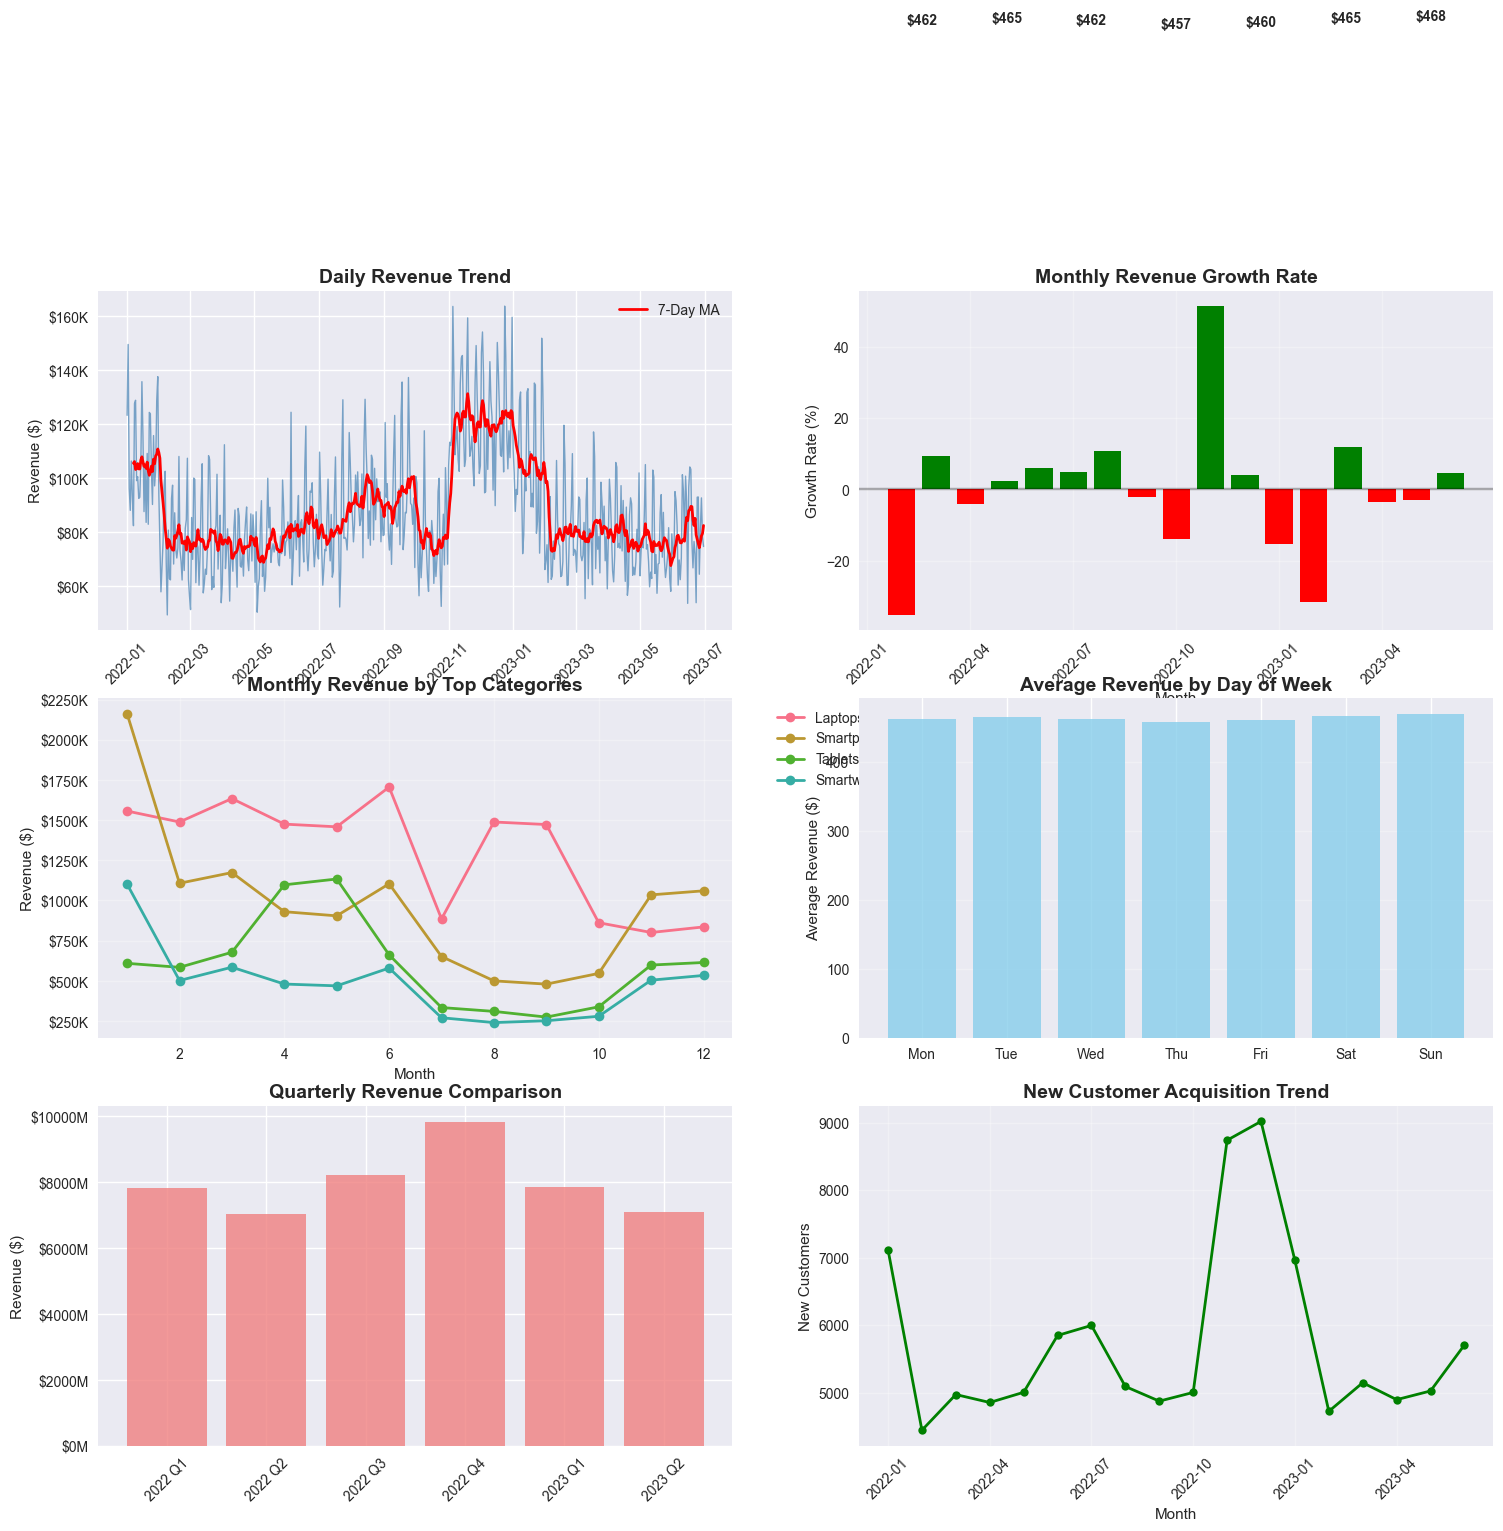

In [12]:
def create_time_series_analysis(df):
    """Comprehensive Time Series Analysis"""
    fig, axes = plt.subplots(3, 2, figsize=(18, 15))
    
    #Daily Revenue Trend
    ax1 = axes[0, 0]
    daily_revenue = df.groupby('date')['revenue'].sum()
    ax1.plot(daily_revenue.index, daily_revenue.values, linewidth=1, alpha=0.7, color='steelblue')
    
    # 7 day moving average
    daily_revenue_ma = daily_revenue.rolling(window=7).mean()
    ax1.plot(daily_revenue_ma.index, daily_revenue_ma.values, linewidth=2, color='red', label='7-Day MA')
    
    ax1.set_title('Daily Revenue Trend', fontweight='bold', fontsize=14)
    ax1.set_ylabel('Revenue ($)')
    ax1.legend()
    ax1.tick_params(axis='x', rotation=45)
    
    # Format y-axis as currency\
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1_000:.0f}K'))
    
    # 2 Monthly Revenue Growth
    ax2 = axes[0, 1]
    monthly_revenue = df.groupby(df['date'].dt.to_period('M'))['revenue'].sum()
    monthly_growth = monthly_revenue.pct_change() * 100
    bars = ax2.bar(range(len(monthly_growth)), monthly_growth.values, color=['green' if x >= 0 else 'red' for x in monthly_growth.values])
    
    ax2.set_title('Monthly Revenue Growth Rate', fontweight='bold', fontsize=14)
    ax2.set_ylabel('Growth Rate (%)')
    ax2.set_xlabel('Month')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.grid(True, alpha=.3)
    
    # Customize x-axis labels
    ax2.set_xticks(range(0, len(monthly_revenue), 3))
    ax2.set_xticklabels([str(monthly_revenue.index[i]) for i in range(0, len(monthly_revenue), 3)], rotation=45)
    
    # 3. Seasonal Analysis - Category Performance
    ax3 = axes[1, 0]
    seasonal_category = df.groupby(['month', 'category'])['revenue'].sum().unstack()
    
    # Plot top 4 categories
    top_categories = df.groupby('category')['revenue'].sum().nlargest(4).index
    
    for category in top_categories:
        if category in seasonal_category.columns:
            ax3.plot(seasonal_category.index, seasonal_category[category], marker='o', linewidth=2, label=category)
    ax3.set_title('Monthly Revenue by Top Categories', fontweight='bold', fontsize=14)
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Revenue ($)')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.grid(True, alpha=0.3)
    ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1_000:.0f}K'))
    
    # 4. Day of Week Analysis
    ax4 = axes[1, 1]
    dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    dow_revenue = df.groupby('day_of_week')['revenue'].mean()
    
    bars = ax4.bar(dow_names, dow_revenue.values, color='skyblue', alpha=.8)
    ax4.set_title('Average Revenue by Day of Week', fontweight='bold', fontsize=14)
    ax4.set_ylabel('Average Revenue ($)')
    ax4.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, value in zip(bars, dow_revenue.values):
        ax4.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, f'${value:.0f}', ha='center', va='bottom', fontweight='bold')
        
    # 5. Quartely Comparison
    ax5 = axes[2, 0]
    quarterly_data = df.groupby(['year', 'quarter']).agg({
        'revenue': 'sum',
        'customer_id': 'nunique',
        'returned': 'mean'
    }).reset_index()
    
    quarterly_data['period'] = quarterly_data['year'].astype(str) + ' ' + quarterly_data['quarter']
    
    bars = ax5.bar(quarterly_data['period'], quarterly_data['revenue'], color='lightcoral', alpha=0.8)
    
    ax5.set_title('Quarterly Revenue Comparison', fontweight='bold', fontsize=14)
    ax5.set_ylabel('Revenue ($)')
    ax5.tick_params(axis='x', rotation=45)
    ax5.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1_000:.0f}M'))
    
    # 6. Customer Acquisition Trend
    ax6 = axes[2, 1]
    # Simulate new customers (first-time buyers)
    customer_first_purchase = df.groupby('customer_id')['date'].min().dt.to_period('M')
    new_customers_monthly = customer_first_purchase.value_counts().sort_index()
    
    ax6.plot(range(len(new_customers_monthly)), 
        new_customers_monthly.values,
                 marker='o', linewidth=2, color='green',
                 markersize=6)
    ax6.set_title('New Customer Acquisition Trend', fontweight='bold', fontsize=14)
    ax6.set_ylabel('New Customers')
    ax6.set_xlabel('Month')
    ax6.grid(True, alpha=0.3)
    
    # Customize x-axis
    ax6.set_xticks(range(0, len(new_customers_monthly), 3))
    ax6.set_xticklabels([str(new_customers_monthly.index[i]) for i in range(0, len(new_customers_monthly), 3)], rotation=45)
    
    plt.tight_layout()
    plt.show()

def create_time_series_analysis(df):
    """Comprehensive Time Series Analysis"""
    fig, axes = plt.subplots(3, 2, figsize=(18, 15))
    
    #Daily Revenue Trend
    ax1 = axes[0, 0]
    daily_revenue = df.groupby('date')['revenue'].sum()
    ax1.plot(daily_revenue.index, daily_revenue.values, linewidth=1, alpha=0.7, color='steelblue')
    
    # 7 day moving average
    daily_revenue_ma = daily_revenue.rolling(window=7).mean()
    ax1.plot(daily_revenue_ma.index, daily_revenue_ma.values, linewidth=2, color='red', label='7-Day MA')
    
    ax1.set_title('Daily Revenue Trend', fontweight='bold', fontsize=14)
    ax1.set_ylabel('Revenue ($)')
    ax1.legend()
    ax1.tick_params(axis='x', rotation=45)
    
    # Format y-axis as currency\
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1_000:.0f}K'))
    
    # 2 Monthly Revenue Growth
    ax2 = axes[0, 1]
    monthly_revenue = df.groupby(df['date'].dt.to_period('M'))['revenue'].sum()
    monthly_growth = monthly_revenue.pct_change() * 100
    bars = ax2.bar(range(len(monthly_growth)), monthly_growth.values, color=['green' if x >= 0 else 'red' for x in monthly_growth.values])
    
    ax2.set_title('Monthly Revenue Growth Rate', fontweight='bold', fontsize=14)
    ax2.set_ylabel('Growth Rate (%)')
    ax2.set_xlabel('Month')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.grid(True, alpha=.3)
    
    # Customize x-axis labels
    ax2.set_xticks(range(0, len(monthly_revenue), 3))
    ax2.set_xticklabels([str(monthly_revenue.index[i]) for i in range(0, len(monthly_revenue), 3)], rotation=45)
    
    # 3. Seasonal Analysis - Category Performance
    ax3 = axes[1, 0]
    seasonal_category = df.groupby(['month', 'category'])['revenue'].sum().unstack()
    
    # Plot top 4 categories
    top_categories = df.groupby('category')['revenue'].sum().nlargest(4).index
    
    for category in top_categories:
        if category in seasonal_category.columns:
            ax3.plot(seasonal_category.index, seasonal_category[category], marker='o', linewidth=2, label=category)
    ax3.set_title('Monthly Revenue by Top Categories', fontweight='bold', fontsize=14)
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Revenue ($)')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.grid(True, alpha=0.3)
    ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1_000:.0f}K'))
    
    # 4. Day of Week Analysis
    ax4 = axes[1, 1]
    dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    dow_revenue = df.groupby('day_of_week')['revenue'].mean()
    
    bars = ax4.bar(dow_names, dow_revenue.values, color='skyblue', alpha=.8)
    ax4.set_title('Average Revenue by Day of Week', fontweight='bold', fontsize=14)
    ax4.set_ylabel('Average Revenue ($)')
    ax4.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, value in zip(bars, dow_revenue.values):
        ax4.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, f'${value:.0f}', ha='center', va='bottom', fontweight='bold')
        
    # 5. Quartely Comparison
    ax5 = axes[2, 0]
    quarterly_data = df.groupby(['year', 'quarter']).agg({
        'revenue': 'sum',
        'customer_id': 'nunique',
        'returned': 'mean'
    }).reset_index()
    
    quarterly_data['period'] = quarterly_data['year'].astype(str) + ' ' + quarterly_data['quarter']
    
    bars = ax5.bar(quarterly_data['period'], quarterly_data['revenue'], color='lightcoral', alpha=0.8)
    
    ax5.set_title('Quarterly Revenue Comparison', fontweight='bold', fontsize=14)
    ax5.set_ylabel('Revenue ($)')
    ax5.tick_params(axis='x', rotation=45)
    ax5.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1_000:.0f}M'))
    
    # 6. Customer Acquisition Trend
    ax6 = axes[2, 1]
    # Simulate new customers (first-time buyers)
    customer_first_purchase = df.groupby('customer_id')['date'].min().dt.to_period('M')
    new_customers_monthly = customer_first_purchase.value_counts().sort_index()
    
    ax6.plot(range(len(new_customers_monthly)), 
        new_customers_monthly.values,
                 marker='o', linewidth=2, color='green',
                 markersize=6)
    ax6.set_title('New Customer Acquisition Trend', fontweight='bold', fontsize=14)
    ax6.set_ylabel('New Customers')
    ax6.set_xlabel('Month')
    ax6.grid(True, alpha=0.3)
    
    # Customize x-axis
    ax6.set_xticks(range(0, len(new_customers_monthly), 3))
    ax6.set_xticklabels([str(new_customers_monthly.index[i]) for i in range(0, len(new_customers_monthly), 3)], rotation=45)
    
    plt.tight_layout()
    plt.show()
    
create_time_series_analysis(df)

### Step 4: Customer Behaviour Analysis

In [14]:
def analyze_customer_behaviour(df):
    """Detailed Customer Behaviour Analysis"""
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    fig.suptitle('Customer Behaviour Analysis', fontsize=20, fontweight='bold')
    
    # 1. Customer Segment Performance
    ax1 = axes[0, 0]
    segment_analysis = df.groupby('customer_segment').agg({
        'revenue': ['sum', 'mean'],
        'customer_id': 'nunique',
        'satisfaction_rating': 'mean',
        'returned': 'mean'
    }).round(2)
    
    segment_analysis.column = ['Total_Revenue', 'avg_order_value', 'Customers', 'Satisfaction_rating']
    
    # Create multple y-axis plot
    x_pos = np.arange(len(segment_analysis.index))
    
    bars1 = ax1.bar(x_pos - 0.2, segment_analysis['Avg_Order_Value'], 0.4,
                    label='Avg Order Value', color='skyblue', alpha=0.8)
     
    ax1_twinx = ax1_twinx()
    bars2 =  ax1_twinx.bar(x_pos + 0.2, segment_analysis['Customers'], 0.4,
                          label='Customer Count',
                          color='lightcoral', alpha=0.8)
    
    ax1.set_title('Customer Segment: Order Value vs Count', fontweight='bold')
    ax1.set_ylabel('Average Order Value ($)', color='blue')
    ax1.twin_set_xlabel('Number of Customers', color='red')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(segment_analysis.index)
    ax1.legend(loc='upper left')
    ax1_twinx.legend(loc='upper right')
    ax1_twinx.grid(False)
        
    # 2. Satisfaction vs spending correlation
    ax2 = axes[0, 1]
    satisfaction_by_spending_tier = df.groupby('spending_tier').agg({
        'satisfaction_rating': 'mean',
        'revenue': 'sum'
    }).round(2)

    ax2.bar(satisfaction_by_spending_tier.index, satisfaction_by_spending_tier['satisfaction_rating'],
            color='lightgreen', alpha=0.8, label='Satisfaction Rating')
    ax2.set_title('Satisfaction Rating by Spending Tier', fontweight='bold')
    ax2.set_ylabel('Satisfaction Rating', color='green')
    ax2.set_xlabel('Spending Tier', color='green')
    ax2.legend(loc='upper left')
    
    bars = ax2.patches
    for bar, value in zip(bars, satisfaction_by_spending_tier['satisfaction_rating']):
        ax2.annotate(f'{value}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom', fontsize=10)

    # Add value labels
    for bar, value in zip(bars, satisfaction_by_spending_tier['satisfaction_rating']):
        ax2.annotate(f'{value}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom', fontsize=10)
    
    # 3. Return Rate Analysis
    ax3 = axes[1, 0]
    return_rate_by_category = df.groupby('product_category').agg({
        'returned': 'mean',
        'revenue': 'sum'
    }).round(2)

    ax3.bar(return_rate_by_category.index, return_rate_by_category['returned'],
            color='salmon', alpha=0.8, label='Return Rate')
    ax3.set_title('Return Rate by Product Category', fontweight='bold')
    ax3.set_ylabel('Return Rate', color='red')
    ax3.set_xlabel('Product Category', color='red')
    ax3.legend(loc='upper left')

    bars = ax3.patches
    for bar, value in zip(bars, return_rate_by_category['returned']):
        ax3.annotate(f'{value}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom', fontsize=10)
        
    # 4. Purchase Frequency Distribution    
    ax4 = axes[1, 1]
    repeat_purchase = df.groupby('customer_segment').agg({
        'customer_id': 'nunique',
        'order_id': 'nunique'
    }).round(2)

    repeat_purchase['repeat_purchase_rate'] = repeat_purchase['order_id'] / repeat_purchase['customer_id']
    ax4.bar(repeat_purchase.index, repeat_purchase['repeat_purchase_rate'],
            color='lightblue', alpha=0.8, label='Repeat Purchase Rate')
    ax4.set_title('Repeat Purchase Rate by Customer Segment', fontweight='bold')
    ax4.set_ylabel('Repeat Purchase Rate', color='blue')
    ax4.set_xlabel('Customer Segment', color='blue')
    ax4.legend(loc='upper left')

    bars = ax4.patches
    for bar, value in zip(bars, repeat_purchase['repeat_purchase_rate']):
        ax4.annotate(f'{value:.2%}', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()